>**Developer:** Mukesh Kumar

>**Email:** coldperformer@gmail.com

>**LinkedIn:** https://www.linkedin.com/in/mk09/

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Post-Profiling Report**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)<br>
  - **7.2** [**Feature Selection Using Random Forest**](#Section72)<br>
  - **7.3** [**Feature Scaling**](#Section73)<br>
  - **7.4** [**Data Splitting**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Linear Regression**](#Section81)<br>
  - **8.2** [**Random Forest**](#Section82)<br>
  - **8.3** [**Final Predictions**](#Section83)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Predicting the price of used cars in both an important and interesting problem.

- According to the <a href = "https://www.bts.gov/archive/publications/national_transportation_statistics/index">**National Transport Authority**</a>, the number of **cars registered** between **2003 and 2013** has spectacular **increase of 234%**. 

- From **68, 524 cars** **registered** in 2003, this number has **now reached 160, 701**.

- With difficult economic conditions, it is likely that **sales** of **second-hand** imported (reconditioned) cars and **used cars** will **increase**.

- It is reported in that the sales of new cars has registered a <a href = "https://motors.mega.mu/news/auto-market-8-decrease-sales-new-cars-20131217.html">**decrease of 8%**</a> in 2013.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Predicting the **resale value** of a car is not a simple task and **requires** pretty good **knowledge** and it depends on a number of **factors**.

- The most important ones are usually the age of the car, its make and model, the origin of the car, its mileage and its horsepower.

- Due to **rising fuel prices**, fuel economy is also of prime importance in addition to look and feel of the car.

- As we can see, the **price** depends on a **large number of factors** and information about all these factors is not always available.

- The **buyer** must make the **decision** to purchase at a certain price based on **few factors only**.

- There is a need for a used car **price prediction system** to effectively **determine** the **worthiness** of the car using a variety of features. 

- Even though there are **websites** that offers this service, their **prediction** method **may not be the best**. 

- Besides, different models and systems may contribute on **predicting power** for a used car’s actual **market value**.

- It is **important** to **know** their actual **market value** while both buying and selling.
<br>

<center><img src="https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/Images/02-Used-Cars-Prices-Intro.gif"></center>

**<h4>Scenario (Hypothetical):</h4>**

<center><img src = "https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/Images/02-Used-Cars-Prices-Problem.png"></center>

- **SWIPECAR**, is an American company that **buys and sells second hand cars**.

- They **initiated** their business in **late 80s** and have gain pretty good popularity over the years.

- Company has started **facing loss** in business due to the evolvement in the area.

- There are **several competitors in the market** who have been using enhanced techniques.

- As the company is pretty old, they have been **using traditional measures** to estimate old cars prices.

- These traditional measures include weight analysis, condition of parts and build year.

- They are **looking for a more robust way** to **estimate** the **price** of old cars.

- Recently they get to know about **data scientists** who helps businesses to sort out such issues.

- They **decided to hire a team of data scientist**. Consider you are one of them…

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q --upgrade datascience                               # A package that is required by pandas-profiling library
!pip install -q --upgrade pandas-profiling                          # A library to generate basic statistics about data
!pip install -q --upgrade yellowbrick                               # Toolbox for Measuring Machine Performance

<a name = Section32></a>
### **3.2 Importing Libraries**

In [68]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy import stats                                             # For scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler                      # To perform normalization
from sklearn.base import BaseEstimator, TransformerMixin            # For Custom Transformers
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import KFold                           # To peform K-validation
from sklearn.metrics import mean_squared_error                      # To estimate model performance
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LinearRegression                   # To create Linear Regression model
from sklearn.ensemble import RandomForestRegressor                  # To create a random forest model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The data set is based on the sales of used cars provided by SWIPECAR.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 204 | 27 | 25.2 KB| 


| Id | Features | Description |#| Id | Features | Description 
| :-- | :-- | :-- | :--: | :-- | :-- | :-- |
|01|**ID**|Unique identity number identifying each record.|#|15|**curb-weight**|Total mass of a vehicle with standard equipment.|
|02|**symbolling**|Degree to which the auto is riskier than its price indicates.|#|16|**engine-type**|Type of engine used in car.|
|03|**normalized-losses**|Relative average loss payment per insured vehicle year.|#|17|**num-of-cylinders**|Number of cylinders used in car.|
|04|**make**|Make of the car.|#|18|**engine-size**|Size of the engine used in car.|
|05|**fuel-type**|Type of fuel consumed by the car.|#|19|**fuel-system**|Type of fuel system used in car.|
|06|**aspiration**|Type of internal combustion engine used.|#|20|**bore**|Diameter of each cylinder in piston engine.|
|07|**num-of-doors**|Number of doors available in car.|#|21|**stroke**|Full travel of the piston along the cylinder, in either direction.|
|08|**body-style**|Body style of car.|#|22|**compression-ratio**|Volume of the cylinder and the combustion chamber when the piston is at the bottom,|
|09|**drive-wheels**|Drive wheel of car.|#|||and the volume of the combustion chamber when the piston is at the top.|
|10|**engine-location**|Location of engine in car.|#|23|**horsepower**|The power an engine produces by a car.|
|11|**wheel-base**|Distance between the centres of the front and rear wheels.|#|24|**peak-rpm**|The max power produced by engine in terms of revolutions per minute.|
|12|**length**|Length of the car.|#|25|**city-mpg**|City milage per gallon rating of car.|
|13|**width**|Width of the car.|#|26|**highway-mpg**|Highway milage per gallon rating of car.|
|14|**height**|Height of the car.|#|27|**price**|Price of the car.|

In [231]:
headers = ["ID", "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", 
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
           "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
           "peak-rpm", "city-mpg", "highway-mpg", "price"]

data = pd.read_csv(filepath_or_buffer='https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/data/03-Used-Cars-Prices.csv', 
                   names=headers)
print('Data Shape:', data.shape)
data.head()

Data Shape: (205, 27)


,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,13495
1,2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,16500
2,3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68,3.47,9.00000,154,5000,19,26,16500
3,4,2,164,audi,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19,3.4,10.00000,102,5500,24,30,13950
4,5,2,164,audi,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19,3.4,8.00000,115,5500,18,22,17450


**Observation:**

- We need to **drop ID feature** to check the duplicacy otherwise we won't be able to identify the duplicates.


In [198]:
data.drop(labels='ID', axis=1, inplace=True)

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [199]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,0.83415,98.75659,174.04927,65.90780,53.72488,2555.56585,126.90732,10.14254,25.21951,30.75122
std,1.24531,6.02178,12.33729,2.14520,2.44352,520.68020,41.64269,3.97204,6.54214,6.88644
min,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,7.00000,13.00000,16.00000
25%,0.00000,94.50000,166.30000,64.10000,52.00000,2145.00000,97.00000,8.60000,19.00000,25.00000
50%,1.00000,97.00000,173.20000,65.50000,54.10000,2414.00000,120.00000,9.00000,24.00000,30.00000
75%,2.00000,102.40000,183.10000,66.90000,55.50000,2935.00000,141.00000,9.40000,30.00000,34.00000
max,3.00000,120.90000,208.10000,72.30000,59.80000,4066.00000,326.00000,23.00000,49.00000,54.00000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Observation:**

- We can **observe** that there are **null values** present inside data as "?".

- We can also **observe** that some features are having **inconsistent data types**.

- But we can never be so sure until we do some analysis.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [201]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')

**Observations:**

- The report shows that there are total 26 features out of which 16 are categorical and 10 are numerical.

- We can observe that missing values (?) are not identified by the report.

- normalized-losses has a high cardinality: 52 distinct values.

- horsepower has a high cardinality: 58 distinct values

- highway-mpg feature is highly correlated with city-mpg feature.

- fuel-system feature is highly correlated with fuel-type feature.

- stroke feature is highly correlated with engine-location feature.

- peak-rpm feature is highly correlated with engine-location feature. 

- symboling feature has 59 (32.6%) zeros

<a name = Section52></a>
### **5.2 Data Cleaning**

In [202]:
# Replacing ? with null values
data.replace("?", np.nan, inplace = True)

# Identifying Null Frequency
missing_frame = pd.DataFrame(index = data.columns.values)
missing_frame['Null Frequency'] = data.isnull().sum().values
missing_frame.transpose()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Null Frequency,0,41,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,2,2,0,0,4


**Performing Operations**

In [203]:
# Estimating median values for missing features
median_normalizedlosses = data['normalized-losses'].median()
median_bore = data['bore'].median()
median_stroke = data['stroke'].median()
median_horsepower = data['horsepower'].median()
median_peakrpm = data['peak-rpm'].median()
mode_numofdoors = data['num-of-doors'].mode()[0]

# Imputing missing values with median value of features
data['normalized-losses'] = data['normalized-losses'].replace(np.nan, median_normalizedlosses)
data['bore'] = data['bore'].replace(np.nan, median_bore)
data['stroke'] = data['stroke'].replace(np.nan, median_stroke)
data['horsepower'] = data['horsepower'].replace(np.nan, median_horsepower)
data['peak-rpm'] = data['peak-rpm'].replace(np.nan, median_peakrpm)
data['num-of-doors'] = data['num-of-doors'].replace(np.nan, mode_numofdoors)

# Dropping the entire rows of missing price value
data.dropna(subset=['price'],axis=0,inplace=True)

# Converting features having inconsistent data types to consistent one
data['normalized-losses'] = data['normalized-losses'].astype(int)
data['bore'] = data['bore'].astype(float)
data['stroke'] = data['stroke'].astype(float)
data['horsepower'] = data['horsepower'].astype(float)
data['peak-rpm'] = data['peak-rpm'].astype(float)
data['price'] = data['price'].astype(float)
print('Success!')

Success!


<a name = Section53></a>
### **5.3 Post Profiling Report**

In [204]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Post Profiling Report.html')

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question:** What is the distribution of prices of cars?</h4>

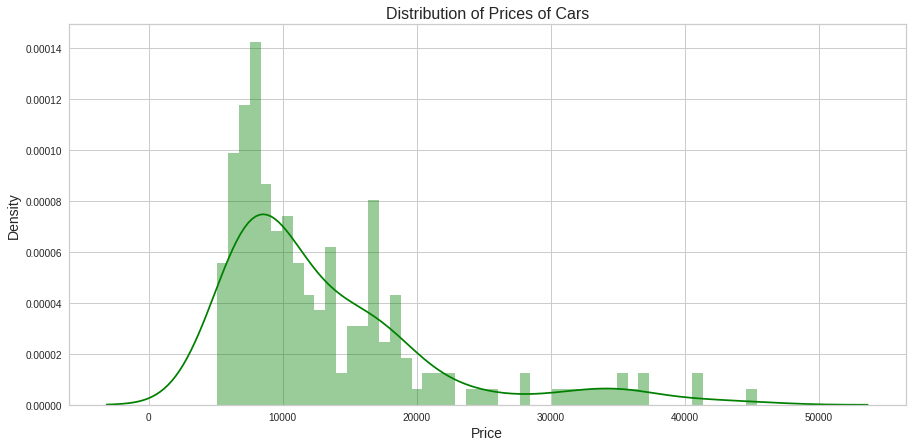

In [205]:
figure=plt.figure(figsize=[15, 7])
sns.distplot(a=data['price'], bins=50, color='green')
plt.xlabel(xlabel='Price', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Distribution of Prices of Cars', size=16)
plt.show()

**<h4>Question:** Which cars are most expensive on average rate?</h4>

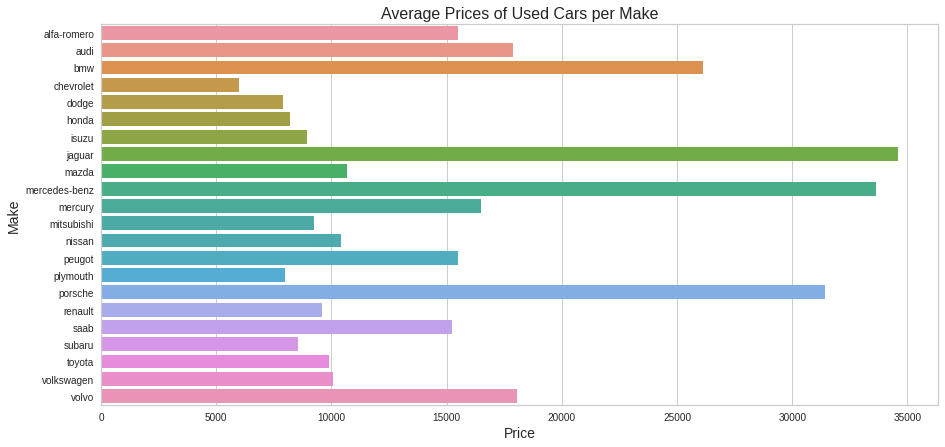

In [206]:
avgMakePrices = data[['make', 'price']].groupby('make').agg('mean').reset_index()

figure = plt.figure(figsize = [15, 7])
sns.barplot(x = 'price', y = 'make', data = avgMakePrices)
plt.xlabel('Price', size = 14)
plt.ylabel('Make', size = 14)
plt.title('Average Prices of Used Cars per Make', size = 16)
plt.show()

**<h4>Question:** What is the proportion of different drive-wheels cars?</h4>

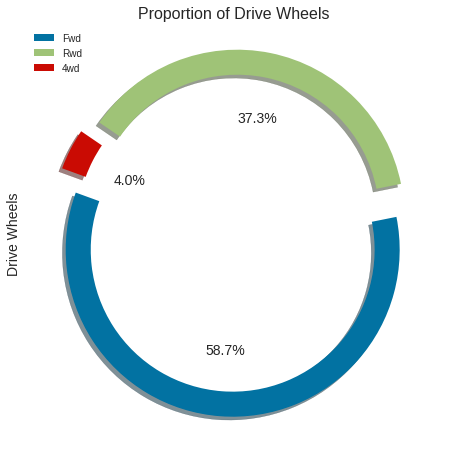

In [207]:
space = np.ones(3)/10
data['drive-wheels'].value_counts().plot(kind='pie', 
                                         explode=space, 
                                         fontsize=14, 
                                         autopct='%3.1f%%', 
                                         wedgeprops=dict(width=0.15), 
                                         shadow=True, 
                                         startangle=160, 
                                         figsize=[13.66, 7.68], 
                                         legend=True, 
                                         labels=None)
plt.legend(['Fwd', 'Rwd', '4wd'])
plt.ylabel('Drive Wheels', size = 14)
plt.title('Proportion of Drive Wheels', size = 16)
plt.show()

**<h4>Question:** Which cars are having horsepower greater than 125hp?</h4>

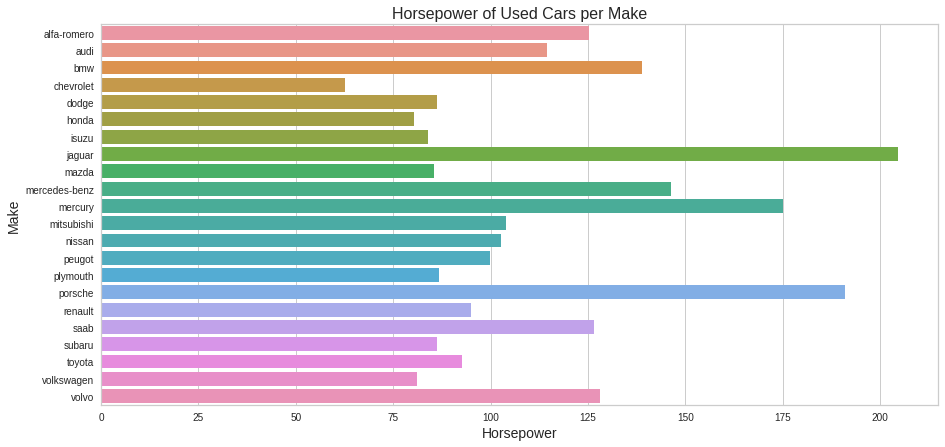

In [208]:
figure = plt.figure(figsize = [15, 7])
sns.barplot(x = 'horsepower', y = 'make', data = data, ci = False)
plt.xlabel('Horsepower', size = 14)
plt.ylabel('Make', size = 14)
plt.title('Horsepower of Used Cars per Make', size = 16)
plt.show()

**<h4>Question:** What is the frequency and proportion of cars having symboling status code greater than 0?</h4>

In [209]:
print('Frequency:', data[['make', 'symboling']][data['symboling']>0].shape)
print('Proportion:', data[['make', 'symboling']][data['symboling']>0].shape[0]/data.shape[0])

Frequency: (111, 2)
Proportion: 0.5522388059701493


<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

- Now we will perform some statistical test to identify important features for our model building.

- Then we will split our data and move ahead with the Model Development part.

<a name = Section71></a>
### **7.1 Feature Encoding**

- Here we will perform encoding over the important categorical features.

In [210]:
cat_cols = []
unique_len = []

for i in data.columns:
  if (data[i].dtype == 'object'):
    cat_cols.append(i)
    unique_len.append(len(data[i].unique()))

cat_frequency = pd.DataFrame()
cat_frequency['Feature'] = cat_cols
cat_frequency['Unique'] = unique_len
cat_frequency.set_index('Feature', inplace = True)
cat_frequency.transpose()

Feature,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
Unique,22,2,2,2,5,3,2,6,7,8


In [211]:
class KFoldTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self ,colnames , targetName, n_fold=5, verbosity=True, discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()

        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state = 42)

        col_mean_name = 'E_' + self.colnames 

        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between [{}] and, [{}] is {}.'.format(col_mean_name, self.targetName, np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.colnames, axis=1)
        return X

In [212]:
kfold_make = KFoldTargetEncoder(colnames='make', targetName='price', discardOriginal_col=True)
kfold_fueltype = KFoldTargetEncoder(colnames='fuel-type', targetName='price', discardOriginal_col=True)
kfold_aspiration = KFoldTargetEncoder(colnames='aspiration', targetName='price', discardOriginal_col=True)
kfold_numofdoors = KFoldTargetEncoder(colnames='num-of-doors', targetName='price', discardOriginal_col=True)
kfold_bodystyle = KFoldTargetEncoder(colnames='body-style', targetName='price', discardOriginal_col=True)
kfold_drivewheels = KFoldTargetEncoder(colnames='drive-wheels', targetName='price', discardOriginal_col=True)
kfold_enginelocation = KFoldTargetEncoder(colnames='engine-location', targetName='price', discardOriginal_col=True)
kfold_enginetype = KFoldTargetEncoder(colnames='engine-type', targetName='price', discardOriginal_col=True)
kfold_numofcylinders = KFoldTargetEncoder(colnames='num-of-cylinders', targetName='price', discardOriginal_col=True)
kfold_fuelsytem = KFoldTargetEncoder(colnames='fuel-system', targetName='price', discardOriginal_col=True)

encodedData = kfold_make.fit_transform(X=data)
encodedData = kfold_fueltype.fit_transform(X=encodedData)
encodedData = kfold_aspiration.fit_transform(X=encodedData)
encodedData = kfold_numofdoors.fit_transform(X=encodedData)
encodedData = kfold_bodystyle.fit_transform(X=encodedData)
encodedData = kfold_drivewheels.fit_transform(X=encodedData)
encodedData = kfold_enginelocation.fit_transform(X=encodedData)
encodedData = kfold_enginetype.fit_transform(X=encodedData)
encodedData = kfold_numofcylinders.fit_transform(X=encodedData)
encodedData = kfold_fuelsytem.fit_transform(X=encodedData)

Correlation between [E_make] and, [price] is 0.2144361539582697.
Correlation between [E_fuel-type] and, [price] is -0.10730344377849126.
Correlation between [E_aspiration] and, [price] is 0.08457709277061952.
Correlation between [E_num-of-doors] and, [price] is -0.2592449094992876.
Correlation between [E_body-style] and, [price] is 0.16693065367520937.
Correlation between [E_drive-wheels] and, [price] is 0.5438041884043482.
Correlation between [E_engine-location] and, [price] is -0.268412441140239.
Correlation between [E_engine-type] and, [price] is 0.15710061989421056.
Correlation between [E_num-of-cylinders] and, [price] is 0.5387713660340822.
Correlation between [E_fuel-system] and, [price] is 0.4468489551830945.


In [213]:
encodedData.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,E_make,E_fuel-type,E_aspiration,E_num-of-doors,E_body-style,E_drive-wheels,E_engine-location,E_engine-type,E_num-of-cylinders,E_fuel-system
0,3,115,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111.00000,5000.00000,21,27,13495.00000,13207.12935,12787.95714,12306.70312,13154.57576,25337.00000,19162.12500,12761.10191,18740.20000,10546.48837,17050.18056
1,3,115,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111.00000,5000.00000,21,27,16500.00000,13207.12935,12787.95714,12306.70312,13154.57576,25337.00000,19162.12500,12761.10191,18740.20000,10546.48837,17050.18056
2,1,115,94.50000,171.20000,65.50000,52.40000,2823,152,2.68000,3.47000,9.00000,154.00000,5000.00000,19,26,16500.00000,13207.12935,12787.95714,12306.70312,13154.57576,10578.86792,19162.12500,12761.10191,25814.91667,22119.35294,17050.18056
3,2,164,99.80000,176.60000,66.20000,54.30000,2337,109,3.19000,3.40000,10.00000,102.00000,5500.00000,24,30,13950.00000,13207.12935,12787.95714,12306.70312,13179.52128,13605.72603,9171.04494,12761.10191,10938.49074,10546.48837,17050.18056
4,2,164,99.40000,176.60000,66.40000,54.30000,2824,136,3.19000,3.40000,8.00000,115.00000,5500.00000,18,22,17450.00000,13207.12935,12787.95714,12306.70312,13179.52128,13605.72603,9211.14286,12761.10191,10938.49074,25374.20000,17050.18056


<a name = Section72></a>
### **7.2 Feature Scaling**

- The values in each features are varying with respect to other features in the dataset.

- To scale them, we will use Min-max scaler .

In [214]:
# tempFrame = encodedData

# cols = encodedData.columns.to_list()
# cols.remove('price')

# scaler = MinMaxScaler()
# encodedData[cols] = scaler.fit_transform(encodedData[cols])
# normalizedData = encodedData
# normalizedData['price'] = tempFrame['price']

# normalizedData.head()

In [216]:
cols = encodedData.columns.to_list()
price_index = cols.index('price')
print('Location of Price feature in encoded dataframe is ', price_index)

# Creating scalers for each feature
scalers = [MinMaxScaler() for obj in range(len(cols))]

for scaler, col in zip(scalers, cols):
    encodedData[col] = scaler.fit_transform(encodedData[[col]])

normalizedData = encodedData
normalizedData.head()

Location of Price feature in encoded dataframe is  15


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,E_make,E_fuel-type,E_aspiration,E_num-of-doors,E_body-style,E_drive-wheels,E_engine-location,E_engine-type,E_num-of-cylinders,E_fuel-system
0,1.00000,0.26178,0.05831,0.41343,0.32479,0.08333,0.41117,0.26038,0.66429,0.29048,0.12500,0.29439,0.34694,0.22222,0.28947,0.20796,1.00000,0.09231,0.11100,0.38963,0.78306,0.79461,0.50542,0.49153,0.04511,0.75830
1,1.00000,0.26178,0.05831,0.41343,0.32479,0.08333,0.41117,0.26038,0.66429,0.29048,0.12500,0.29439,0.34694,0.22222,0.28947,0.28256,1.00000,0.09231,0.11100,0.38963,0.78306,0.79461,0.50542,0.49153,0.04511,0.75830
2,0.60000,0.26178,0.23032,0.44925,0.44444,0.38333,0.51784,0.34340,0.10000,0.66667,0.12500,0.49533,0.34694,0.16667,0.26316,0.28256,1.00000,0.09231,0.11100,0.38963,0.04520,0.79461,0.50542,0.74742,0.75150,0.75830
3,0.80000,0.51832,0.38484,0.52985,0.50427,0.54167,0.32933,0.18113,0.46429,0.63333,0.18750,0.25234,0.55102,0.30556,0.36842,0.21925,1.00000,0.09231,0.11100,0.40015,0.19653,0.00633,0.50542,0.20934,0.04511,0.75830
4,0.80000,0.51832,0.37318,0.52985,0.52137,0.54167,0.51823,0.28302,0.46429,0.63333,0.06250,0.31308,0.55102,0.13889,0.15789,0.30614,1.00000,0.09231,0.11100,0.40015,0.19653,0.00949,0.50542,0.20934,0.95017,0.75830


In [217]:
# cols = encodedData.columns.to_list()

# scaler = MinMaxScaler()
# encodedData[cols] = scaler.fit_transform(encodedData[cols])
# normalizedData = encodedData

# normalizedData.head()

<a name = Section73></a>
### **7.3 Feature Selection using Random Forest**

- Now in **real world**, it is very **rare** that **all** the **features** are **important** while developing the model.

- So **instead** we **analyze** the **impact** of **input over the target** feature.

- We do so by either performing **statistical** **tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- **Random forests** are one the most **popular machine learning algorithms** because they **provide**:
 - **a good predictive performance**,
 - **low overfitting and**
 - **easy interpretability.**

- This **interpretability** is **derived** from the **importance of each feature** on the tree decision **evaluated** on the **reduction** in **impurity**.

- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

- **Below** we have **implemented** a function namely, **SelectFromModel** **available** in **Sklearn** which **uses** the **base estimator** to **identify** **important features**.

- The **importance** of feature is **determined** on the **basis** of **threshold** (a measure to calculate feature importance).

In [218]:
X = normalizedData.drop(labels='price', axis=1)
y = normalizedData['price']

In [219]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals=2))
print('Features:', selected_feat)

Total Features Selected are 3
Threshold set by Model: 0.04
Features: ['curb-weight', 'engine-size', 'highway-mpg']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

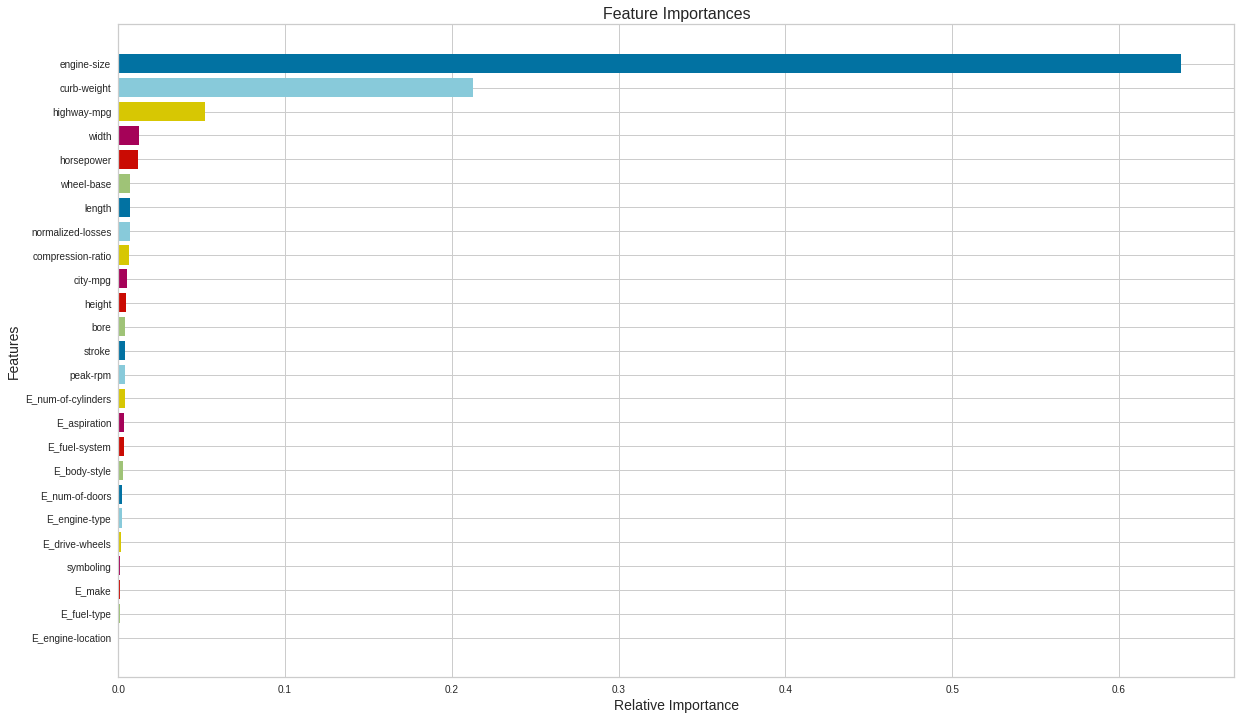

In [220]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name = Section74></a>
### **7.4 Data Splitting**

In [221]:
X = normalizedData[selected_feat]
y = normalizedData['price']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (160, 3) (160,)
Testing Data Shape: (41, 3) (41,)


<a name = Section8></a>
# **8. Model Development & Evaluation**

- Now we will create different models to train and evaluate the performance of them.

- Below we have created a function to plot the score of the model based on train set and test set.

In [223]:
def PlotScore(y_train, y_train_pred, y_test, y_test_pred):
    '''
    Plot visual of acutal and predicted for train & test data
    y_train: actual values of y train
    y_train_pred: predicted values of y_train
    y_test: actual values of y_test
    y_test_pred: predicted values of y_test
    '''
    train_index = [x for x in range(1, len(y_train) + 1)]
    test_index = [x for x in range(1, len(y_test) + 1)]

    plt.figure(figsize = [15, 6])
    plt.subplot(2, 1, 1)
    sns.lineplot(x=train_index, y=y_train, marker='o', color='r')
    sns.lineplot(x=train_index, y = y_train_pred, marker='o', color='b')
    plt.xlabel(xlabel='Index', size=14)
    plt.ylabel(ylabel='Prediction', size=14)
    plt.title(label='For Train Data', size=16)
    plt.grid(b=True)

    plt.subplot(2, 1, 2)
    sns.lineplot(x=test_index, y=y_test, marker='o', color='r')
    sns.lineplot(x=test_index, y=y_test_pred, marker='o', color='b')
    plt.xlabel(xlabel='Index', size=14)
    plt.ylabel(ylabel='Prediction', size=14)
    plt.title(label='For Test Data', size=16)
    plt.grid(b=True)
    plt.tight_layout()
    plt.show()

<a name = Section81></a>
## **8.1 Linear Regression**


Acutal Values: [0.07772702 0.89858994 0.043121   0.10277543 0.16712179]
Predicted Values: [0.05060162 0.49180413 0.01857865 0.07475329 0.1959718 ]
RMSE (Train Data): 0.14
RMSE (Test Data): 0.14
R-Squared (Train Data): 81.0 %
R-Squared (Test Data): 75.0 %


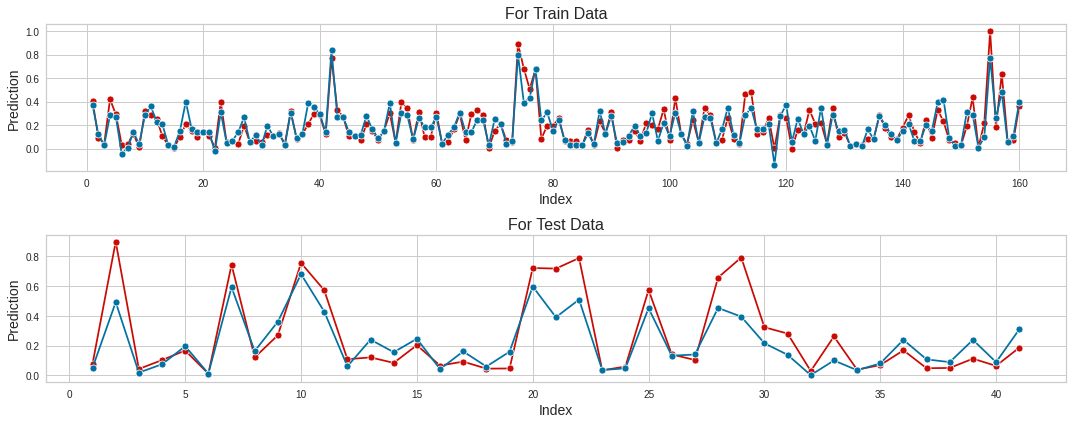

In [224]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)), decimals=2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)), decimals=2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(lr.score(X_train, y_train), decimals=2) * 100, '%')
print('R-Squared (Test Data):', np.round(lr.score(X_test, y_test), decimals=2) * 100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

<a name = Section82></a>
## **8.2 Random Forest Regression**

Acutal Values: [0.07772702 0.89858994 0.043121   0.10277543 0.16712179]
Predicted Values: [0.05580345 0.60473316 0.02263549 0.07377452 0.19868793]
RMSE (Train Data): 0.09
RMSE (Test Data): 0.09
R-Squared (Train Data): 98.0 %
R-Squared (Test Data): 90.0 %


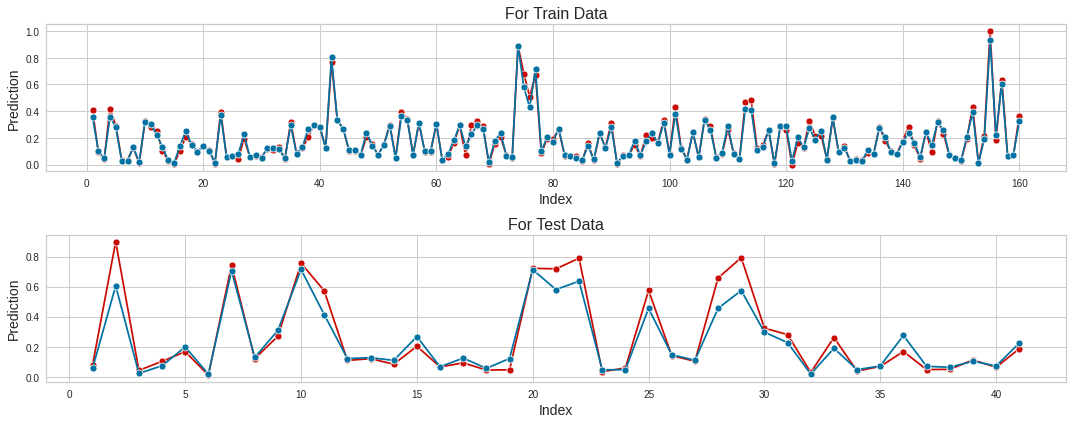

In [225]:
randomforest = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
randomforest.fit(X_train, y_train)
y_train_pred = randomforest.predict(X_train)
y_test_pred = randomforest.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)), decimals=2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)), decimals=2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(randomforest.score(X_train, y_train), decimals=2) * 100, '%')
print('R-Squared (Test Data):', np.round(randomforest.score(X_test, y_test), decimals=2) * 100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

<a name = Section83></a>
## **8.3 Testing of Predictions**

In [230]:
# Feature to be passed are 'curb-weight', 'engine-size', 'highway-mpg'
prediction = randomforest.predict([[0.58, 0.56, 0.87]])

true_value = scalers[15].inverse_transform(prediction.reshape(-1, 1))
print('True value of the used car is', true_value, 'USD')

True value of the used car is [[29338.036]] USD


<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**


- We analyzed and understood the behavior of the data and performed manipulations accordingly.

- We didn't go through the data analysis in-depth as the use case was associated with identifying the best model for future data.

- We performed various transformations over the features as per the requirement and tried out Linear Regression and Random Forest.

- It turns out that the Random Forest gave us the best accuracy on test data i.e. around 90%.


<a name = Section92></a>
### **9.2 Actionable Insights**

- The company should focus on existing customers more that the new customers.

- The company should analyze what the competitors offer and learn new techniques, thinking of ways to outdo them.

-  The promotions and marketing can give the customers a great deal of existence of the products or services in the market.

- Credibility is the one of the key factors that makes the customers trust and feel comfortable with your products and services.